# 最低加油次数

**题目来源：力扣（LeetCode）**

**链接：https://leetcode-cn.com/problems/minimum-number-of-refueling-stops/**

## 一、题目

汽车从起点出发驶向目的地，该目的地位于出发位置东面 target 英里处。

沿途有加油站，每个 station[i] 代表一个加油站，它位于出发位置东面 station[i][0] 英里处，并且有 station[i][1] 升汽油。

假设汽车油箱的容量是无限的，其中最初有 startFuel 升燃料。它每行驶 1 英里就会用掉 1 升汽油。

当汽车到达加油站时，它可能停下来加油，将所有汽油从加油站转移到汽车中。

为了到达目的地，汽车所必要的最低加油次数是多少？如果无法到达目的地，则返回 -1 。

注意：如果汽车到达加油站时剩余燃料为 0，它仍然可以在那里加油。如果汽车到达目的地时剩余燃料为 0，仍然认为它已经到达目的地。

## 二、示例

### 示例 1：

输入：target = 1, startFuel = 1, stations = []

输出：0

解释：我们可以在不加油的情况下到达目的地。

### 示例 2：

输入：target = 100, startFuel = 1, stations = [[10,100]]

输出：-1

解释：我们无法抵达目的地，甚至无法到达第一个加油站。

### 示例 3：

输入：target = 100, startFuel = 10, stations = [[10,60],[20,30],[30,30],[60,40]]

输出：2

解释：

我们出发时有 10 升燃料。

我们开车来到距起点 10 英里处的加油站，消耗 10 升燃料。将汽油从 0 升加到 60 升。

然后，我们从 10 英里处的加油站开到 60 英里处的加油站（消耗 50 升燃料），

并将汽油从 10 升加到 50 升。然后我们开车抵达目的地。

我们沿途在1两个加油站停靠，所以返回 2 。

## 三、解题思路

汽车经过n个加油站，对于这n个加油站，应该在哪个加油站停下加油，最终既能到达终点，又使得加油次数最少？

若按顺序遍历加油站，则面临：

- 如果在某个加油站停下加油，可能是没必要的，有可能不进行这次加油也可以到达终点
- 如果在某个加油站不停下加油，可能由于汽油不足而无法达到终点，或者后面需要加更多次的油

### 贪心

#### 贪心规律

- 何时加油最合适：油用光的时候最合适

- 在那个加油站加油最合适：在油最多的加油站加油最合适

#### 算法

- 设置一个大顶堆，用来储存路过的加油站的汽油量
- 按照从起点到终点的方向，遍历各个加油站之间的距离
- 每次需要走加油站之间的距离d，发现汽油不够走d时，从最大堆中取出一个油量添加，直到可以足够走距离d
- 如果把最大堆的汽油都添加仍不够进行距离d，则无法到达终点
- 当前油量减少d
- 将当前加油站添加至最大堆

#### 图示（来自网络）

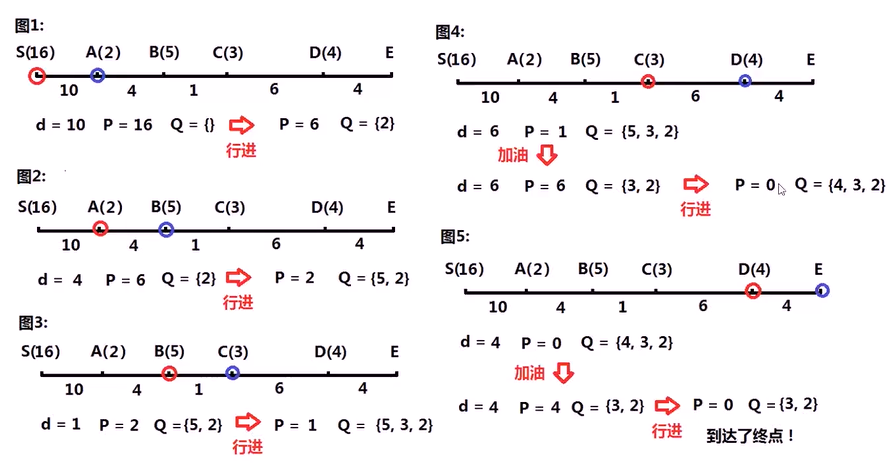

In [1]:
import heapq
def minRefuelStops(target, startFuel, stations):
    # 模拟大顶堆
    Q = []
    # 加油次数
    result = 0
    # 当前位置
    cur_pos = 0
    # 需要把终点加入进去
    stations.append([target, 0])
    # 排序加油站
    stations = sorted(stations, key=lambda x: x[0])
    for station in stations:
        # 到下一个加油站的距离
        dis = station[0] - cur_pos
        while Q and startFuel < dis:
            # 去不到下一个站点，进行加油
            # 模拟大顶堆所以push进入的都是相反数，这里加上相反数即为减去
            startFuel -= heapq.heappop(Q)
            result += 1
        # 加完所有之前加油站的油还是到不了下一个站点，则无法到达终点
        if not Q and startFuel < dis:
            return -1
        # 油量减去去下一个站点的距离到达站点
        startFuel -= dis
        # 当前位置变更
        cur_pos = station[0]
        # 将站点油量加入大顶堆，因为模拟，加入其相反数
        heapq.heappush(Q,-station[1])
    return result

In [2]:
minRefuelStops(1, 1, [])

0

In [3]:
minRefuelStops(100, 1, [[10, 100]])

-1

In [4]:
minRefuelStops(100,10,[[10,60],[20,30],[30,30],[60,40]])

2